In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
import cv2
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import os
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten



In [ ]:
os.listdir('/content/drive/MyDrive/Brain_Tumor/Training')

['glioma', 'notumor', 'meningioma', 'pituitary']

In [ ]:
data_test=os.listdir('/content/drive/MyDrive/Brain_Tumor/Testing')
data_test

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
datadir='/content/drive/MyDrive/Brain_Tumor/Training'
datatest='/content/drive/MyDrive/Brain_Tumor/Testing'

In [ ]:
X_train=[]
y_train=[]
categories=['glioma', 'notumor', 'meningioma', 'pituitary']
for i in categories:
  training_path=os.path.join(datadir,i)
  #print(training_path)#setted the path for images
  #printing images
  images=os.listdir(training_path)
  #print(images)
  for img in images:
    img_path=os.path.join(training_path,img)
    #print(img_path)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1))
    X_train.append(img_resized)
    y_train.append(categories.index(i))
  print("Category loaded:",i)



Category loaded: glioma
Category loaded: notumor
Category loaded: meningioma
Category loaded: pituitary


In [ ]:
X_test=[]
y_test=[]
categories=['glioma', 'notumor', 'meningioma', 'pituitary']
for i in categories:
  testing_path=os.path.join(datatest,i)
  #print(testing_path)#setted the path for images
  #printing images
  images=os.listdir(testing_path)
  #print(images)
  print(i,":",len(images))
  for img in images:
    img_path=os.path.join(testing_path,img)
    #print(img_path)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1))
    X_test.append(img_resized)
    y_test.append(categories.index(i))
  print("Category loaded:",i)



glioma : 300
Category loaded: glioma
notumor : 405
Category loaded: notumor
meningioma : 306
Category loaded: meningioma
pituitary : 300
Category loaded: pituitary


In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
print(X_train.shape)

(5529, 150, 150, 1)


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=100,epochs=5)

Epoch 1/5
56/56 [==============================] - 81s 1s/step - loss: 1.2571 - accuracy: 0.3554
Epoch 2/5
56/56 [==============================] - 82s 1s/step - loss: 0.8347 - accuracy: 0.6426
Epoch 3/5
56/56 [==============================] - 80s 1s/step - loss: 0.7608 - accuracy: 0.7135
Epoch 4/5
56/56 [==============================] - 92s 2s/step - loss: 0.6913 - accuracy: 0.7441
Epoch 5/5
56/56 [==============================] - 84s 1s/step - loss: 0.6454 - accuracy: 0.7680


In [ ]:
loss,accu=model.evaluate(X_test,y_test)
print("Loss:",loss)
print("Accuracy:",accu)

41/41 [==============================] - 6s 134ms/step - loss: 0.6308 - accuracy: 0.7948
Loss: 0.6307671666145325
Accuracy: 0.7948130965232849


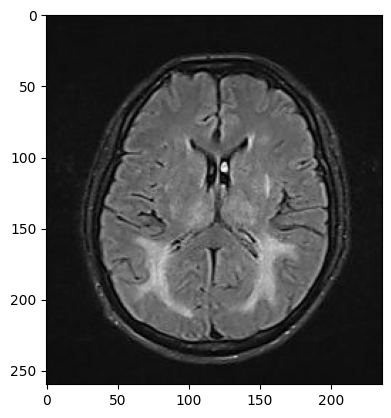

In [ ]:
img=imread('/content/drive/MyDrive/Brain_Tumor/Testing/notumor/Te-noTr_0001.jpg')
plt.imshow(img)

In [ ]:
img=resize(img,(150,150,1))
img_array=np.array(img)
img_array=img_array.reshape(1,150,150,1)

In [ ]:
pred=model.predict(img_array)
print(pred)

1/1 [==============================] - 0s 70ms/step
[[2.4093322e-03 9.7790271e-01 1.9681679e-02 6.2253389e-06]]


In [ ]:
ind=pred.argmax()
ind

1

In [ ]:
print(categories[ind])

notumor
